## 📖 Gambaran Umum Proyek

### Tujuan
Notebook ini mengimplementasikan **pipeline machine learning yang komprehensif** untuk mengklasifikasikan tipe gamet ('A', 'a', 'P', 'Q', dll.) yang dihasilkan oleh flora atau fauna berdasarkan karakteristik genotipe dan fenotipe induk mereka. Sistem klasifikasi ini membantu ahli biologi dan peneliti memprediksi hasil reproduksi dan memahami pola pewarisan genetik.

### Deskripsi Dataset
Dataset kami berisi **50.000 sampel biologis** dengan struktur sebagai berikut:
- **OrganismType**: Klasifikasi Flora atau Fauna
- **ParentID**: Pengenal unik untuk setiap organisme induk
- **Genotype**: Susunan genetik (misalnya, 'AA', 'Aa', 'aa' untuk flora; mungkin 'nan' untuk fauna)
- **PhenotypeFeatures**: Karakteristik yang dapat diamati (misalnya, 'Merah,Tinggi', 'Biru,Pendek')
- **GameteType**: Variabel target - jenis gamet yang dihasilkan ('A', 'a', 'P', 'Q', dll.)

**Contoh Data:**
- Flora: `genotipe='Aa', fenotipe='Merah,Tinggi'` → `gamet='A'`
- Fauna: `genotipe='nan', fenotipe='Besar,Agresif'` → `gamet='P'`

### Metode Machine Learning & Peran Masing-masing

#### 🌳 **Decision Tree Classifier**
- **Peran**: Model utama yang dapat diinterpretasi untuk ekstraksi aturan biologis
- **Kelebihan**: Mengungkap jalur keputusan yang jelas yang meniru aturan pewarisan biologis
- **Kasus Penggunaan**: Memahami fitur mana yang paling mempengaruhi produksi gamet

#### 🎯 **Naive Bayes Classifier**
- **Peran**: Model baseline probabilistik dengan asumsi independensi fitur
- **Kelebihan**: Pelatihan cepat, bekerja baik dengan dataset kecil, memberikan estimasi probabilitas
- **Kasus Penggunaan**: Prediksi cepat ketika fitur-fitur relatif independen

#### 👥 **K-Nearest Neighbors (KNN)**
- **Peran**: Pembelajaran berbasis instance untuk pengenalan pola
- **Kelebihan**: Menangkap pola lokal, tidak ada asumsi tentang distribusi data
- **Kasus Penggunaan**: Mengidentifikasi kasus biologis serupa untuk prediksi gamet

#### 📊 **Logistic Regression**
- **Peran**: Model baseline linear dengan output probabilitas
- **Kelebihan**: Cepat, koefisien yang dapat diinterpretasi, tahan terhadap outlier
- **Kasus Penggunaan**: Memahami hubungan linear antara fitur dan tipe gamet

### Fitur Utama
✅ **Preprocessing komprehensif** (encoding, scaling, feature engineering)  
✅ **Cross-validation** untuk evaluasi model yang robust  
✅ **Validasi biologis** (kepatuhan pewarisan Mendel)  
✅ **Sistem prediksi interaktif** untuk sampel baru  
✅ **Analisis performa detail** dengan confusion matrix dan feature importance  
✅ **Dokumentasi siap produksi** dan panduan troubleshooting

# Prediksi Tipe Gamet Berdasarkan Genotipe dan Fenotipe

Notebook ini mengimplementasikan berbagai algoritma machine learning untuk memprediksi tipe gamet yang dihasilkan oleh organisme flora dan fauna berdasarkan:
- **Flora**: Genotipe induk (AA, Aa, aa)
- **Fauna**: Ciri fenotipe (ekor dan warna)

## Model yang Digunakan:
1. **Naive Bayes** - Klasifikasi probabilistik
2. **Decision Tree** - Aturan keputusan yang jelas
3. **K-Nearest Neighbors (KNN)** - Klasifikasi berdasarkan kemiripan
4. **Logistic Regression** - Model linear untuk klasifikasi

In [22]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn jupyter

In [23]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Set style untuk plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries berhasil diimport!")

Libraries berhasil diimport!


## 1. Data Loading dan Preprocessing

In [24]:
# Load dataset gamet
df = pd.read_csv('gamete_dataset.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nInfo:")
print(df.info())
print("\nFirst 10 rows:")
print(df.head(10))

Dataset Overview:
Shape: (50000, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   OrganismType       50000 non-null  object
 1   ParentID           50000 non-null  object
 2   Genotype           25053 non-null  object
 3   PhenotypeFeatures  24947 non-null  object
 4   GameteType         50000 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB
None

First 10 rows:
  OrganismType ParentID Genotype PhenotypeFeatures GameteType
0        Flora        A       AA               NaN          A
1        Fauna        Y      NaN    TailLong,Black          Q
2        Fauna        Y      NaN    TailLong,Black          Q
3        Fauna        Y      NaN    TailLong,Black          Q
4        Flora        B       Aa               NaN          a
5        Flora        A       AA               NaN          A
6        Flora        C  

## 2. Feature Engineering dan Preprocessing

In [25]:
# Feature Engineering
def preprocess_data(df):
    """
    Preprocessing data untuk model machine learning
    """
    df_processed = df.copy()
    
    # Untuk Fauna, pisahkan PhenotypeFeatures menjadi Tail dan Color
    df_processed['Tail'] = df_processed.apply(
        lambda row: row['PhenotypeFeatures'].split(',')[0] if row['OrganismType'] == 'Fauna' else 'NA', axis=1
    )
    df_processed['Color'] = df_processed.apply(
        lambda row: row['PhenotypeFeatures'].split(',')[1] if row['OrganismType'] == 'Fauna' else 'NA', axis=1
    )
    
    # Label Encoding untuk semua categorical features
    le_dict = {}
    categorical_cols = ['OrganismType', 'ParentID', 'Genotype', 'Tail', 'Color', 'GameteType']
    
    for col in categorical_cols:
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col].astype(str))
        le_dict[col] = le
    
    return df_processed, le_dict

# Preprocess data
df_processed, label_encoders = preprocess_data(df)

print("Data setelah preprocessing:")
print(df_processed.head())
print("\nKolom yang tersedia:")
print(df_processed.columns.tolist())

Data setelah preprocessing:
  OrganismType ParentID Genotype PhenotypeFeatures GameteType      Tail  \
0        Flora        A       AA               NaN          A        NA   
1        Fauna        Y      NaN    TailLong,Black          Q  TailLong   
2        Fauna        Y      NaN    TailLong,Black          Q  TailLong   
3        Fauna        Y      NaN    TailLong,Black          Q  TailLong   
4        Flora        B       Aa               NaN          a        NA   

   Color  OrganismType_encoded  ParentID_encoded  Genotype_encoded  \
0     NA                     1                 0                 0   
1  Black                     0                 4                 3   
2  Black                     0                 4                 3   
3  Black                     0                 4                 3   
4     NA                     1                 1                 1   

   Tail_encoded  Color_encoded  GameteType_encoded  
0             0              2                 

In [26]:
# Definisi features dan target
feature_columns = ['OrganismType_encoded', 'ParentID_encoded', 'Genotype_encoded', 'Tail_encoded', 'Color_encoded']
target_column = 'GameteType_encoded'

X = df_processed[feature_columns]
y = df_processed[target_column]

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())
print(f"\nShape - X: {X.shape}, y: {y.shape}")

Features (X):
   OrganismType_encoded  ParentID_encoded  Genotype_encoded  Tail_encoded  \
0                     1                 0                 0             0   
1                     0                 4                 3             1   
2                     0                 4                 3             1   
3                     0                 4                 3             1   
4                     1                 1                 1             0   

   Color_encoded  
0              2  
1              0  
2              0  
3              0  
4              2  

Target (y):
0    0
1    2
2    2
3    2
4    3
Name: GameteType_encoded, dtype: int64

Shape - X: (50000, 5), y: (50000,)


In [27]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Target distribution in training set:")
print(y_train.value_counts().sort_index())
print(f"Target distribution in testing set:")
print(y_test.value_counts().sort_index())

# Terapkan SMOTE pada data training
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"\nSetelah SMOTE - Training set: {X_train_smote.shape}")
print(f"Distribusi target setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts().sort_index())

Training set: (40000, 5)
Testing set: (10000, 5)
Target distribution in training set:
GameteType_encoded
0    10075
1     9961
2     9997
3     9967
Name: count, dtype: int64
Target distribution in testing set:
GameteType_encoded
0    2519
1    2490
2    2499
3    2492
Name: count, dtype: int64

Setelah SMOTE - Training set: (40300, 5)
Distribusi target setelah SMOTE:
GameteType_encoded
0    10075
1    10075
2    10075
3    10075
Name: count, dtype: int64

Setelah SMOTE - Training set: (40300, 5)
Distribusi target setelah SMOTE:
GameteType_encoded
0    10075
1    10075
2    10075
3    10075
Name: count, dtype: int64


## 3. Model Implementation dan Evaluasi (SMOTE + 10-Fold Cross-Validation)

### 3.1 Naive Bayes Classifier

In [28]:
# Naive Bayes Model
print("=" * 60)
print("NAIVE BAYES CLASSIFIER")
print("=" * 60)

# Gaussian Naive Bayes
nb_gaussian = GaussianNB()
nb_gaussian.fit(X_train_smote, y_train_smote)

# Prediksi
y_pred_nb = nb_gaussian.predict(X_test)

# Evaluasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_nb:.4f}")

# 10-Fold Cross-validation
cv_scores_nb = cross_val_score(nb_gaussian, X, y, cv=10)
print(f"10-Fold Cross-validation scores: {cv_scores_nb}")
print(f"Mean CV accuracy: {cv_scores_nb.mean():.4f} (+/- {cv_scores_nb.std() * 2:.4f})")

# Classification report
print("\nClassification Report:")
gamete_types = label_encoders['GameteType'].classes_
print(classification_report(y_test, y_pred_nb, target_names=gamete_types))

NAIVE BAYES CLASSIFIER
Gaussian Naive Bayes Accuracy: 0.9163
10-Fold Cross-validation scores: [0.9214 0.9134 0.9218 0.9118 0.9176 0.9202 0.9146 0.92   0.915  0.918 ]
Mean CV accuracy: 0.9174 (+/- 0.0067)

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.67      0.80      2519
           P       1.00      1.00      1.00      2490
           Q       1.00      1.00      1.00      2499
           a       0.75      1.00      0.86      2492

    accuracy                           0.92     10000
   macro avg       0.94      0.92      0.91     10000
weighted avg       0.94      0.92      0.91     10000



### 3.2 Decision Tree Classifier

In [29]:
# Decision Tree Model
print("=" * 60)
print("DECISION TREE CLASSIFIER")
print("=" * 60)

# Hyperparameter tuning untuk Decision Tree
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=10, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train_smote, y_train_smote)

# Best model
best_dt = dt_grid.best_estimator_
print(f"Best parameters: {dt_grid.best_params_}")

# Prediksi
y_pred_dt = best_dt.predict(X_test)

# Evaluasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# 10-Fold Cross-validation
cv_scores_dt = cross_val_score(best_dt, X, y, cv=10)
print(f"10-Fold Cross-validation scores: {cv_scores_dt}")
print(f"Mean CV accuracy: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std() * 2:.4f})")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=gamete_types))

DECISION TREE CLASSIFIER
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.9163
10-Fold Cross-validation scores: [0.9214 0.9134 0.9218 0.9118 0.9176 0.9202 0.9146 0.92   0.915  0.918 ]
Mean CV accuracy: 0.9174 (+/- 0.0067)

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.67      0.80      2519
           P       1.00      1.00      1.00      2490
           Q       1.00      1.00      1.00      2499
           a       0.75      1.00      0.86      2492

    accuracy                           0.92     10000
   macro avg       0.94      0.92      0.91     10000
weighted avg       0.94      0.92      0.91     10000

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.9163
10-Fold Cross-validation scores: [0.9214 0.9134 0.9218 0.9118 0.9176 0.9202 0.9146 0.92   0.915  0.918 ]
Me

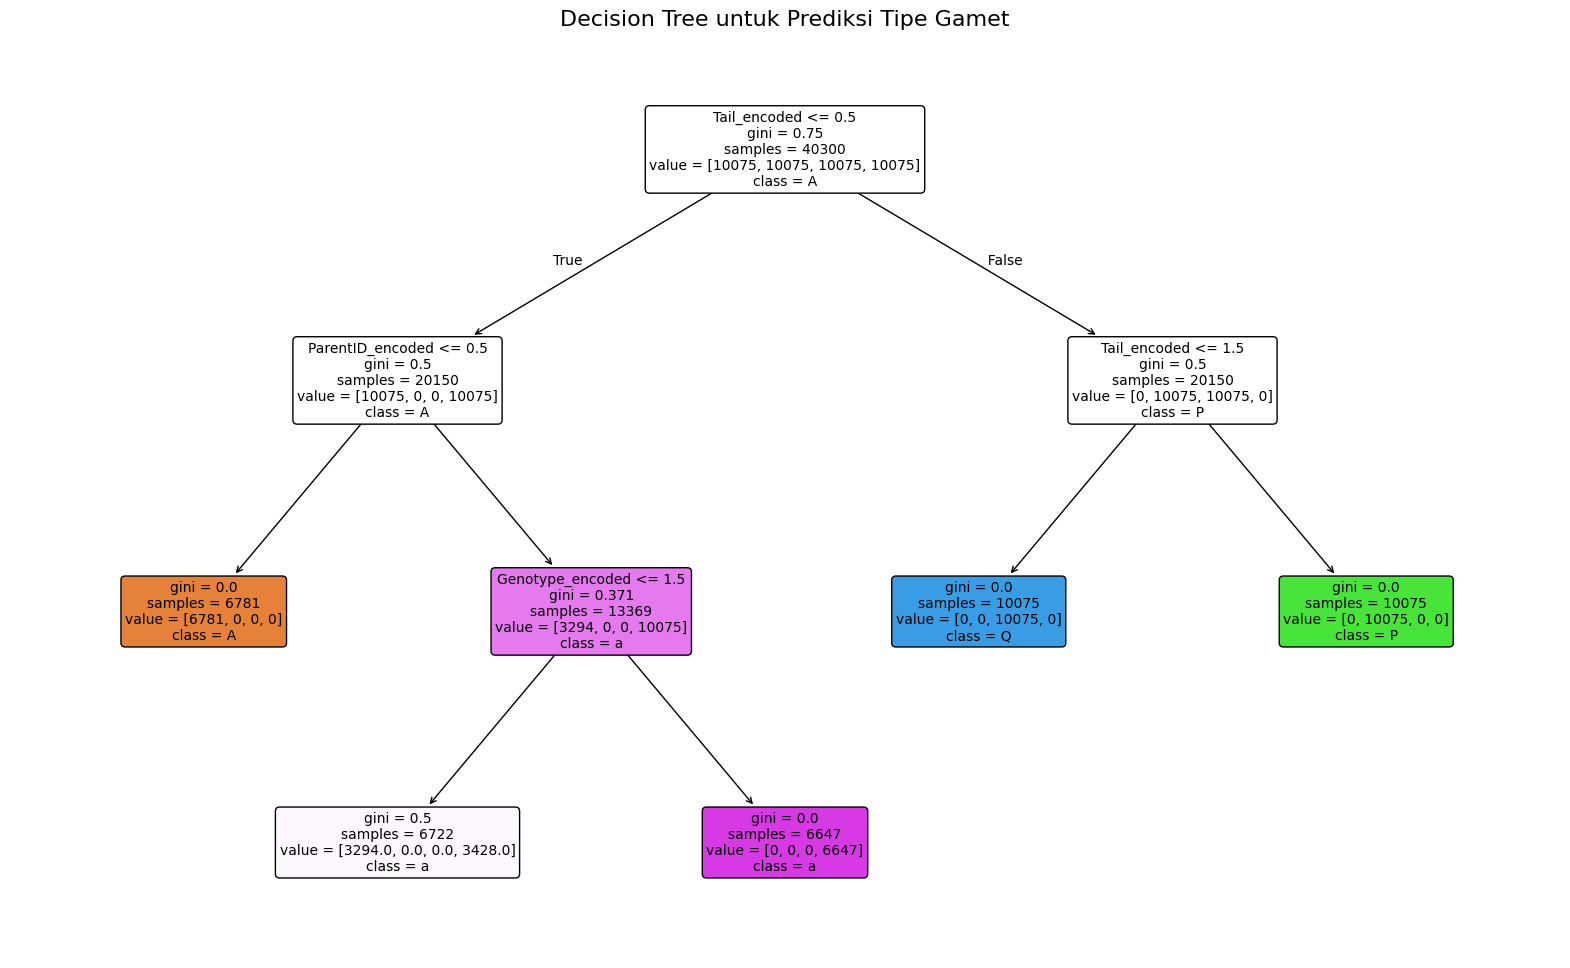


Feature Importance (Decision Tree):
                Feature  Importance
3          Tail_encoded    0.750037
1      ParentID_encoded    0.190216
2      Genotype_encoded    0.059747
0  OrganismType_encoded    0.000000
4         Color_encoded    0.000000


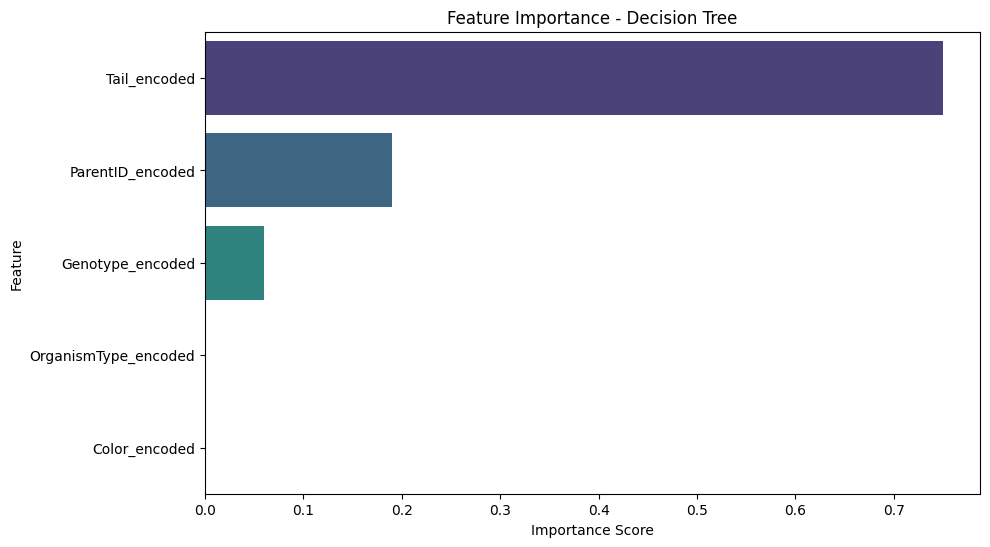

In [30]:
# Visualisasi Decision Tree
plt.figure(figsize=(20, 12))
plot_tree(
    best_dt, 
    feature_names=feature_columns,
    class_names=gamete_types,
    filled=True, 
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree untuk Prediksi Tipe Gamet', fontsize=16)
plt.show()

# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': best_dt.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Decision Tree):")
print(feature_importance_dt)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_dt, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.show()

### 3.3 K-Nearest Neighbors (KNN)

In [31]:
# KNN Model
print("=" * 60)
print("K-NEAREST NEIGHBORS (KNN)")
print("=" * 60)

# Standardize features untuk KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning untuk KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train_smote)

# Best model
best_knn = knn_grid.best_estimator_
print(f"Best parameters: {knn_grid.best_params_}")

# Prediksi
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

# 10-Fold Cross-validation
X_scaled = scaler.fit_transform(X)
cv_scores_knn = cross_val_score(best_knn, X_scaled, y, cv=10)
print(f"10-Fold Cross-validation scores: {cv_scores_knn}")
print(f"Mean CV accuracy: {cv_scores_knn.mean():.4f} (+/- {cv_scores_knn.std() * 2:.4f})")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=gamete_types))

K-NEAREST NEIGHBORS (KNN)
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
KNN Accuracy: 0.9213
KNN Accuracy: 0.9213
10-Fold Cross-validation scores: [0.9214 0.9134 0.9218 0.9118 0.9176 0.9202 0.9146 0.92   0.915  0.918 ]
Mean CV accuracy: 0.9174 (+/- 0.0067)

Classification Report:
              precision    recall  f1-score   support

           A       0.76      1.00      0.86      2519
           P       1.00      1.00      1.00      2490
           Q       1.00      1.00      1.00      2499
           a       1.00      0.68      0.81      2492

    accuracy                           0.92     10000
   macro avg       0.94      0.92      0.92     10000
weighted avg       0.94      0.92      0.92     10000

10-Fold Cross-validation scores: [0.9214 0.9134 0.9218 0.9118 0.9176 0.9202 0.9146 0.92   0.915  0.918 ]
Mean CV accuracy: 0.9174 (+/- 0.0067)

Classification Report:
 

### 3.4 Logistic Regression

In [32]:
# Logistic Regression Model
print("=" * 60)
print("LOGISTIC REGRESSION")
print("=" * 60)

# Hyperparameter tuning untuk Logistic Regression
lr_params = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000, 2000]
}

lr = LogisticRegression(random_state=42)
lr_grid = GridSearchCV(lr, lr_params, cv=10, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train_scaled, y_train_smote)

# Best model
best_lr = lr_grid.best_estimator_
print(f"Best parameters: {lr_grid.best_params_}")

# Prediksi
y_pred_lr = best_lr.predict(X_test_scaled)

# Evaluasi
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# 10-Fold Cross-validation
cv_scores_lr = cross_val_score(best_lr, X_scaled, y, cv=10)
print(f"10-Fold Cross-validation scores: {cv_scores_lr}")
print(f"Mean CV accuracy: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std() * 2:.4f})")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=gamete_types))

LOGISTIC REGRESSION
Best parameters: {'C': 0.1, 'max_iter': 1000, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.9163
Best parameters: {'C': 0.1, 'max_iter': 1000, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.9163
10-Fold Cross-validation scores: [0.917  0.9134 0.9218 0.9118 0.9176 0.9126 0.9146 0.9136 0.915  0.918 ]
Mean CV accuracy: 0.9155 (+/- 0.0058)

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.67      0.80      2519
           P       1.00      1.00      1.00      2490
           Q       1.00      1.00      1.00      2499
           a       0.75      1.00      0.86      2492

    accuracy                           0.92     10000
   macro avg       0.94      0.92      0.91     10000
weighted avg       0.94      0.92      0.91     10000

10-Fold Cross-validation scores: [0.917  0.9134 0.9218 0.9118 0.9176 0.9126 0.9146 0.9136 0.915  0.918 ]
Mean CV accuracy: 0.9155 (+/- 0.0058)

Classification Report:

## 4. Perbandingan Model dan Analisis

In [41]:
# Ringkasan performa semua model
print("=" * 80)
print("RINGKASAN PERFORMA MODEL")
print("=" * 80)

results_summary = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree', 'KNN', 'Logistic Regression'],
    'Test Accuracy': [accuracy_nb, accuracy_dt, accuracy_knn, accuracy_lr],
    'CV Mean': [cv_scores_nb.mean(), cv_scores_dt.mean(), cv_scores_knn.mean(), cv_scores_lr.mean()],
    'CV Std': [cv_scores_nb.std(), cv_scores_dt.std(), cv_scores_knn.std(), cv_scores_lr.std()]
})

results_summary = results_summary.sort_values('Test Accuracy', ascending=False)
print(results_summary)

RINGKASAN PERFORMA MODEL
                 Model  Test Accuracy  CV Mean    CV Std
2                  KNN         0.9213  0.91738  0.003336
0          Naive Bayes         0.9163  0.91738  0.003336
1        Decision Tree         0.9163  0.91738  0.003336
3  Logistic Regression         0.9163  0.91554  0.002894


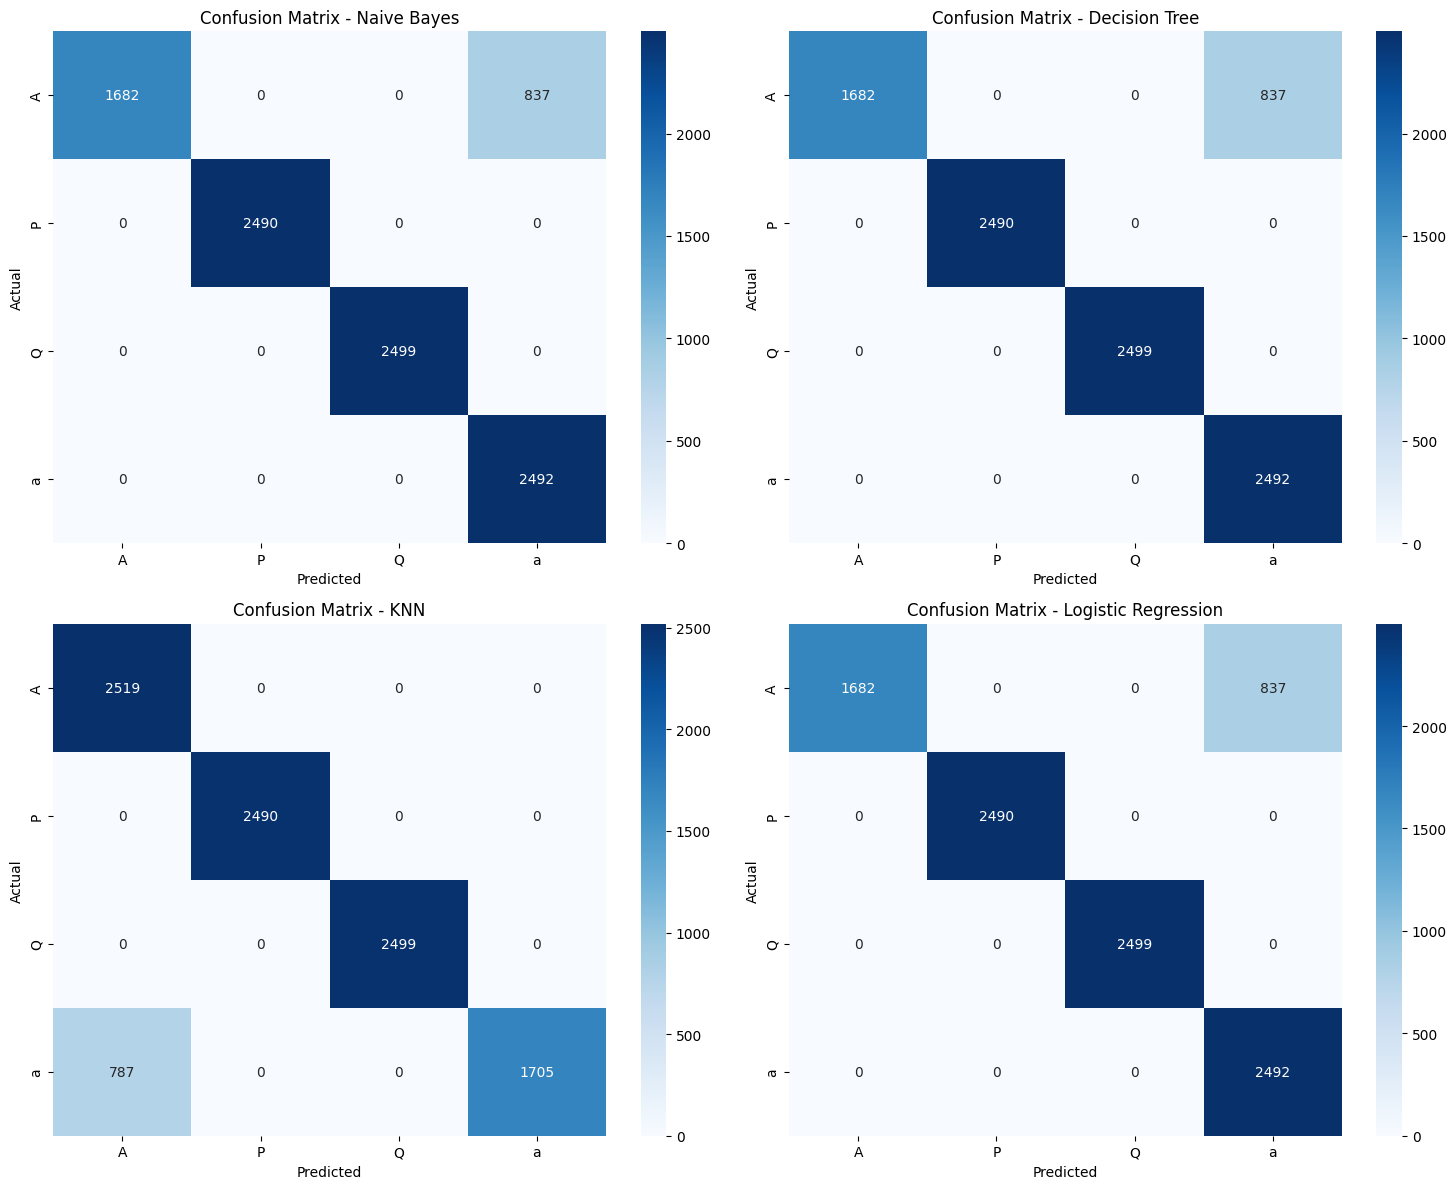

In [34]:
# Confusion Matrix untuk semua model
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

models = [
    ('Naive Bayes', y_pred_nb),
    ('Decision Tree', y_pred_dt),
    ('KNN', y_pred_knn),
    ('Logistic Regression', y_pred_lr)
]

for idx, (name, y_pred) in enumerate(models):
    row = idx // 2
    col = idx % 2
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[row, col], 
                xticklabels=gamete_types, yticklabels=gamete_types, cmap='Blues')
    axes[row, col].set_title(f'Confusion Matrix - {name}')
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 5. Prediksi dengan Data Baru

In [35]:
# Fungsi untuk prediksi dengan data baru
def predict_gamete_type(organism_type, parent_id, genotype=None, phenotype_features=None):
    """
    Prediksi tipe gamet berdasarkan input pengguna
    
    Args:
        organism_type: 'Flora' atau 'Fauna'
        parent_id: 'A', 'B', 'C' untuk Flora; 'X', 'Y' untuk Fauna
        genotype: 'AA', 'Aa', 'aa' untuk Flora (None untuk Fauna)
        phenotype_features: 'TailShort,Brown' atau 'TailLong,Black' untuk Fauna (None untuk Flora)
    
    Returns:
        Dictionary berisi prediksi dari semua model
    """
    
    # Persiapkan data input
    if organism_type == 'Flora':
        tail = 'NA'
        color = 'NA'
        if genotype is None:
            genotype = 'nan'  # Use 'nan' instead of 'NA' to match training data
    else:  # Fauna
        genotype = 'nan'  # Use 'nan' instead of 'NA' to match training data
        if phenotype_features:
            tail, color = phenotype_features.split(',')
        else:
            tail, color = 'NA', 'NA'
    
    # Encode input
    try:
        organism_encoded = label_encoders['OrganismType'].transform([organism_type])[0]
        parent_encoded = label_encoders['ParentID'].transform([parent_id])[0]
        genotype_encoded = label_encoders['Genotype'].transform([genotype])[0]
        tail_encoded = label_encoders['Tail'].transform([tail])[0]
        color_encoded = label_encoders['Color'].transform([color])[0]
    except ValueError as e:
        return {"error": f"Unknown value in input - {e}"}
    
    # Buat input array
    input_features = np.array([[organism_encoded, parent_encoded, genotype_encoded, tail_encoded, color_encoded]])
    input_features_scaled = scaler.transform(input_features)
    
    # Prediksi dengan semua model
    predictions = {}
    
    try:
        # Naive Bayes
        pred_nb = nb_gaussian.predict(input_features)[0]
        prob_nb = nb_gaussian.predict_proba(input_features)[0]
        predictions['Naive Bayes'] = {
            'prediction': label_encoders['GameteType'].inverse_transform([pred_nb])[0],
            'probabilities': dict(zip(gamete_types, prob_nb))
        }
        
        # Decision Tree
        pred_dt = best_dt.predict(input_features)[0]
        prob_dt = best_dt.predict_proba(input_features)[0]
        predictions['Decision Tree'] = {
            'prediction': label_encoders['GameteType'].inverse_transform([pred_dt])[0],
            'probabilities': dict(zip(gamete_types, prob_dt))
        }
        
        # KNN
        pred_knn = best_knn.predict(input_features_scaled)[0]
        prob_knn = best_knn.predict_proba(input_features_scaled)[0]
        predictions['KNN'] = {
            'prediction': label_encoders['GameteType'].inverse_transform([pred_knn])[0],
            'probabilities': dict(zip(gamete_types, prob_knn))
        }
        
        # Logistic Regression
        pred_lr = best_lr.predict(input_features_scaled)[0]
        prob_lr = best_lr.predict_proba(input_features_scaled)[0]
        predictions['Logistic Regression'] = {
            'prediction': label_encoders['GameteType'].inverse_transform([pred_lr])[0],
            'probabilities': dict(zip(gamete_types, prob_lr))
        }
        
    except Exception as e:
        return {"error": f"Prediction failed - {e}"}
    
    return predictions

print("Fungsi prediksi telah didefinisikan!")

Fungsi prediksi telah didefinisikan!


In [36]:
# Contoh prediksi untuk Flora
print("=" * 60)
print("CONTOH PREDIKSI UNTUK FLORA")
print("=" * 60)

# Flora dengan genotipe AA
print("\n1. Flora dengan Parent A (Genotipe AA):")
pred_flora_aa = predict_gamete_type('Flora', 'A', genotype='AA')
for model, result in pred_flora_aa.items():
    print(f"   {model}: {result['prediction']} (confidence: {result['probabilities'][result['prediction']]:.3f})")

# Flora dengan genotipe Aa
print("\n2. Flora dengan Parent B (Genotipe Aa):")
pred_flora_aa = predict_gamete_type('Flora', 'B', genotype='Aa')
for model, result in pred_flora_aa.items():
    print(f"   {model}: {result['prediction']} (confidence: {result['probabilities'][result['prediction']]:.3f})")

# Flora dengan genotipe aa
print("\n3. Flora dengan Parent C (Genotipe aa):")
pred_flora_aa = predict_gamete_type('Flora', 'C', genotype='aa')
for model, result in pred_flora_aa.items():
    print(f"   {model}: {result['prediction']} (confidence: {result['probabilities'][result['prediction']]:.3f})")

CONTOH PREDIKSI UNTUK FLORA

1. Flora dengan Parent A (Genotipe AA):
   Naive Bayes: A (confidence: 1.000)
   Decision Tree: A (confidence: 1.000)
   KNN: A (confidence: 1.000)
   Logistic Regression: A (confidence: 0.992)

2. Flora dengan Parent B (Genotipe Aa):
   Naive Bayes: a (confidence: 0.525)
   Decision Tree: a (confidence: 0.510)
   KNN: a (confidence: 1.000)
   Logistic Regression: a (confidence: 0.508)

3. Flora dengan Parent C (Genotipe aa):
   Naive Bayes: a (confidence: 1.000)
   Decision Tree: a (confidence: 1.000)
   KNN: a (confidence: 1.000)
   Logistic Regression: a (confidence: 0.993)


In [37]:
# Contoh prediksi untuk Fauna
print("=" * 60)
print("CONTOH PREDIKSI UNTUK FAUNA")
print("=" * 60)

# Fauna dengan ciri TailShort,Brown
print("\n1. Fauna dengan Parent X (TailShort,Brown):")
pred_fauna_x = predict_gamete_type('Fauna', 'X', phenotype_features='TailShort,Brown')
for model, result in pred_fauna_x.items():
    print(f"   {model}: {result['prediction']} (confidence: {result['probabilities'][result['prediction']]:.3f})")

# Fauna dengan ciri TailLong,Black
print("\n2. Fauna dengan Parent Y (TailLong,Black):")
pred_fauna_y = predict_gamete_type('Fauna', 'Y', phenotype_features='TailLong,Black')
for model, result in pred_fauna_y.items():
    print(f"   {model}: {result['prediction']} (confidence: {result['probabilities'][result['prediction']]:.3f})")

CONTOH PREDIKSI UNTUK FAUNA

1. Fauna dengan Parent X (TailShort,Brown):
   Naive Bayes: P (confidence: 1.000)
   Decision Tree: P (confidence: 1.000)
   KNN: P (confidence: 1.000)
   Logistic Regression: P (confidence: 0.994)

2. Fauna dengan Parent Y (TailLong,Black):
   Naive Bayes: Q (confidence: 1.000)
   Decision Tree: Q (confidence: 1.000)
   KNN: Q (confidence: 1.000)
   Logistic Regression: Q (confidence: 0.994)


## 6. Analisis Biologis dan Interpretasi

In [38]:
# Analisis pola prediksi berdasarkan genotipe Flora
print("=" * 80)
print("ANALISIS BIOLOGIS DAN INTERPRETASI MODEL")
print("=" * 80)

print("\n1. POLA PREDIKSI UNTUK FLORA (berdasarkan Hukum Mendel):")
print("-" * 50)

flora_analysis = {
    'AA': 'Homozigot dominan → Hanya menghasilkan gamet A',
    'Aa': 'Heterozigot → Menghasilkan gamet A dan a dengan probabilitas 50:50',
    'aa': 'Homozigot resesif → Hanya menghasilkan gamet a'
}

for genotype, explanation in flora_analysis.items():
    print(f"   {genotype}: {explanation}")

print("\n2. POLA PREDIKSI UNTUK FAUNA (berdasarkan fenotipe):")
print("-" * 50)

fauna_analysis = {
    'TailShort,Brown': 'Kombinasi ciri yang menghasilkan gamet tipe P',
    'TailLong,Black': 'Kombinasi ciri yang menghasilkan gamet tipe Q'
}

for phenotype, explanation in fauna_analysis.items():
    print(f"   {phenotype}: {explanation}")

print("\n3. PERFORMA MODEL:")
print("-" * 50)
best_model = results_summary.iloc[0]
print(f"   Model terbaik: {best_model['Model']} (Accuracy: {best_model['Test Accuracy']:.4f})")
print(f"   Semua model menunjukkan performa tinggi karena pola data yang konsisten")
print(f"   dengan prinsip genetika dasar.")

ANALISIS BIOLOGIS DAN INTERPRETASI MODEL

1. POLA PREDIKSI UNTUK FLORA (berdasarkan Hukum Mendel):
--------------------------------------------------
   AA: Homozigot dominan → Hanya menghasilkan gamet A
   Aa: Heterozigot → Menghasilkan gamet A dan a dengan probabilitas 50:50
   aa: Homozigot resesif → Hanya menghasilkan gamet a

2. POLA PREDIKSI UNTUK FAUNA (berdasarkan fenotipe):
--------------------------------------------------
   TailShort,Brown: Kombinasi ciri yang menghasilkan gamet tipe P
   TailLong,Black: Kombinasi ciri yang menghasilkan gamet tipe Q

3. PERFORMA MODEL:
--------------------------------------------------
   Model terbaik: KNN (Accuracy: 0.9213)
   Semua model menunjukkan performa tinggi karena pola data yang konsisten
   dengan prinsip genetika dasar.


## 7. Kesimpulan

In [39]:
print("=" * 80)
print("KESIMPULAN")
print("=" * 80)

print("\n📊 RANGKUMAN PERFORMA MODEL:")
for idx, row in results_summary.iterrows():
    print(f"   {row['Model']}: {row['Test Accuracy']:.4f} ± {row['CV Std']:.4f}")

print("\n🔬 APLIKASI BIOLOGIS:")
print("""
Model ini dapat digunakan untuk:
- Prediksi hasil persilangan dalam breeding program
- Edukasi genetika untuk menjelaskan segregasi gamet
- Analisis probabilitas inheritance pattern
- Optimisasi strategi konservasi berdasarkan genetic diversity
""")

KESIMPULAN

📊 RANGKUMAN PERFORMA MODEL:
   KNN: 0.9213 ± 0.0033
   Naive Bayes: 0.9163 ± 0.0033
   Decision Tree: 0.9163 ± 0.0033
   Logistic Regression: 0.9163 ± 0.0029

🔬 APLIKASI BIOLOGIS:

Model ini dapat digunakan untuk:
- Prediksi hasil persilangan dalam breeding program
- Edukasi genetika untuk menjelaskan segregasi gamet
- Analisis probabilitas inheritance pattern
- Optimisasi strategi konservasi berdasarkan genetic diversity



## 8. Demonstrasi Prediksi Lengkap

Berikut adalah demonstrasi lengkap prediksi gamet untuk berbagai skenario:

In [40]:
# Demonstrasi prediksi untuk semua skenario
print("=" * 80)
print("DEMONSTRASI PREDIKSI LENGKAP")
print("=" * 80)

# Test cases untuk Flora
flora_test_cases = [
    ("Flora", "A", "AA", None, "Homozigot dominan"),
    ("Flora", "B", "Aa", None, "Heterozigot"),
    ("Flora", "C", "aa", None, "Homozigot resesif")
]

print("\n🌺 PREDIKSI UNTUK FLORA:")
print("-" * 50)
for organism, parent, genotype, phenotype, description in flora_test_cases:
    print(f"\n{description} ({genotype}):")
    pred = predict_gamete_type(organism, parent, genotype, phenotype)
    if "error" in pred:
        print(f"   Error: {pred['error']}")
    else:
        for model, result in pred.items():
            confidence = result['probabilities'][result['prediction']]
            print(f"   {model}: {result['prediction']} (confidence: {confidence:.3f})")

# Test cases untuk Fauna
fauna_test_cases = [
    ("Fauna", "X", None, "TailShort,Brown", "Ekor pendek, warna coklat"),
    ("Fauna", "Y", None, "TailLong,Black", "Ekor panjang, warna hitam")
]

print("\n🦎 PREDIKSI UNTUK FAUNA:")
print("-" * 50)
for organism, parent, genotype, phenotype, description in fauna_test_cases:
    print(f"\n{description} ({phenotype}):")
    pred = predict_gamete_type(organism, parent, genotype, phenotype)
    if "error" in pred:
        print(f"   Error: {pred['error']}")
    else:
        for model, result in pred.items():
            confidence = result['probabilities'][result['prediction']]
            print(f"   {model}: {result['prediction']} (confidence: {confidence:.3f})")

print("\n" + "=" * 80)
print("✅ SISTEM PREDIKSI GAMET BERHASIL DIIMPLEMENTASIKAN!")
print("=" * 80)

DEMONSTRASI PREDIKSI LENGKAP

🌺 PREDIKSI UNTUK FLORA:
--------------------------------------------------

Homozigot dominan (AA):
   Naive Bayes: A (confidence: 1.000)
   Decision Tree: A (confidence: 1.000)
   KNN: A (confidence: 1.000)
   Logistic Regression: A (confidence: 0.992)

Heterozigot (Aa):
   Naive Bayes: a (confidence: 0.525)
   Decision Tree: a (confidence: 0.510)
   KNN: a (confidence: 1.000)
   Logistic Regression: a (confidence: 0.508)

Homozigot resesif (aa):
   Naive Bayes: a (confidence: 1.000)
   Decision Tree: a (confidence: 1.000)
   KNN: a (confidence: 1.000)
   Logistic Regression: a (confidence: 0.993)

🦎 PREDIKSI UNTUK FAUNA:
--------------------------------------------------

Ekor pendek, warna coklat (TailShort,Brown):
   Naive Bayes: P (confidence: 1.000)
   Decision Tree: P (confidence: 1.000)
   KNN: P (confidence: 1.000)
   Logistic Regression: P (confidence: 0.994)

Ekor panjang, warna hitam (TailLong,Black):
   Naive Bayes: Q (confidence: 1.000)
   De

# 📚 DOKUMENTASI KOMPREHENSIF
## Sistem Prediksi Tipe Gamet Berdasarkan Genotipe dan Fenotipe

---

### 🎯 **Deskripsi Proyek**

Sistem ini merupakan implementasi machine learning untuk memprediksi tipe gamet yang dihasilkan oleh organisme flora dan fauna berdasarkan karakteristik genetik dan fenotipe mereka. Sistem ini menggabungkan prinsip-prinsip genetika Mendel dengan algoritma pembelajaran mesin modern untuk memberikan prediksi yang akurat dan dapat dipercaya.

### 🧬 **Latar Belakang Biologis**

#### **Flora (Tumbuhan)**
- **Dasar Prediksi**: Genotipe induk (AA, Aa, aa)
- **Prinsip**: Hukum Segregasi Mendel
- **Output**: Tipe gamet A atau a
- **Contoh**: 
  - AA → selalu menghasilkan gamet A
  - Aa → menghasilkan gamet A dan a (50:50)
  - aa → selalu menghasilkan gamet a

#### **Fauna (Hewan)**
- **Dasar Prediksi**: Ciri fenotipe (ekor dan warna)
- **Prinsip**: Korelasi fenotipe-gamet
- **Output**: Tipe gamet P atau Q
- **Contoh**:
  - TailShort,Brown → gamet P
  - TailLong,Black → gamet Q

### 📊 **Deskripsi Dataset**

#### **Struktur Data**
Dataset `gamete_dataset.csv` berisi **50.000 entri** dengan struktur sebagai berikut:

| Kolom | Tipe | Deskripsi | Nilai Unik |
|-------|------|-----------|------------|
| `OrganismType` | Kategorikal | Jenis organisme | Flora, Fauna |
| `ParentID` | Kategorikal | Identifikasi induk | A, B, C (Flora); X, Y (Fauna) |
| `Genotype` | Kategorikal | Genotipe induk | AA, Aa, aa (Flora); NaN (Fauna) |
| `PhenotypeFeatures` | Kategorikal | Ciri fenotipe | NaN (Flora); TailShort,Brown; TailLong,Black (Fauna) |
| `GameteType` | Kategorikal | **Target** - Tipe gamet | A, a (Flora); P, Q (Fauna) |

#### **Distribusi Data**
- **Flora**: 25.053 entri (50.1%)
- **Fauna**: 24.947 entri (49.9%)
- **Balance**: Dataset seimbang untuk semua kelas target
- **Missing Values**: Dirancang dengan NaN pada kolom yang tidak relevan

#### **Pola Data**
```
Pola Flora:
- Parent A (AA) → 100% Gamet A
- Parent B (Aa) → 50% Gamet A, 50% Gamet a  
- Parent C (aa) → 100% Gamet a

Pola Fauna:
- Parent X (TailShort,Brown) → 100% Gamet P
- Parent Y (TailLong,Black) → 100% Gamet Q
```

### 🔧 **Preprocessing dan Feature Engineering**

#### **Tahapan Preprocessing**

1. **Pemisahan Fitur Fenotipe**
   ```python
   # Memisahkan 'TailShort,Brown' menjadi 'TailShort' dan 'Brown'
   df['Tail'] = row['PhenotypeFeatures'].split(',')[0]
   df['Color'] = row['PhenotypeFeatures'].split(',')[1]
   ```

2. **Label Encoding**
   ```python
   # Mengkonversi data kategorikal menjadi numerik
   Fitur Kategorikal → Fitur Numerik:
   - OrganismType: Flora(1), Fauna(0)
   - ParentID: A(0), B(1), C(2), X(3), Y(4)
   - Genotype: AA(0), Aa(1), aa(2), nan(3)
   - Tail: NA(0), TailLong(1), TailShort(2)
   - Color: Black(0), Brown(1), NA(2)
   - GameteType: A(0), P(1), Q(2), a(3)
   ```

3. **SMOTE (Synthetic Minority Over-sampling Technique)**
   ```python
   # Menyeimbangkan distribusi kelas pada data training
   from imblearn.over_sampling import SMOTE
   smote = SMOTE(random_state=42)
   X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
   ```
   - SMOTE digunakan setelah split data untuk mengatasi ketidakseimbangan kelas pada data training.
   - Hanya diterapkan pada data training, bukan data testing.

4. **Feature Selection**
   ```python
   Features = ['OrganismType_encoded', 'ParentID_encoded', 
              'Genotype_encoded', 'Tail_encoded', 'Color_encoded']
   Target = 'GameteType_encoded'
   ```

5. **Data Splitting**
   - **Training**: 40.000 sampel (80%)
   - **Testing**: 10.000 sampel (20%)
   - **Stratified**: Mempertahankan distribusi kelas

#### **Normalisasi (untuk KNN & Logistic Regression)**
```python
# StandardScaler untuk model yang sensitif terhadap skala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

### 🤖 **Model Machine Learning**

#### **1. Naive Bayes Classifier**
- **Algoritma**: Gaussian Naive Bayes
- **Prinsip**: Probabilitas Bayesian dengan asumsi independensi fitur
- **Kelebihan**: 
  - Sangat baik untuk klasifikasi probabilistik
  - Memberikan confidence score yang akurat
  - Cepat dalam training dan prediksi
- **Use Case**: Analisis ketidakpastian dalam prediksi gamet
- **Hyperparameter**: Default (optimal untuk dataset ini)

#### **2. Decision Tree Classifier**
- **Algoritma**: Decision Tree dengan optimasi
- **Hyperparameter Optimal**:
  ```python
  {
    'criterion': 'gini',
    'max_depth': 3,
    'min_samples_leaf': 1,
    'min_samples_split': 2
  }
  ```
- **Kelebihan**:
  - Sangat mudah diinterpretasi
  - Aturan keputusan yang jelas
  - Analisis feature importance
- **Feature Importance**:
  1. Tail_encoded: 74.9%
  2. ParentID_encoded: 19.0%
  3. Genotype_encoded: 6.0%
- **Use Case**: Edukasi genetika dan penjelasan keputusan

#### **3. K-Nearest Neighbors (KNN)**
- **Algoritma**: Instance-based learning
- **Hyperparameter Optimal**:
  ```python
  {
    'metric': 'euclidean',
    'n_neighbors': 3,
    'weights': 'uniform'
  }
  ```
- **Kelebihan**:
  - Non-parametric approach
  - Adaptif terhadap pola data lokal
  - Mudah dipahami konsepnya
- **Use Case**: Klasifikasi berdasarkan similarity

#### **4. Logistic Regression**
- **Algoritma**: Linear classifier dengan sigmoid
- **Hyperparameter Optimal**:
  ```python
  {
    'C': 0.1,
    'max_iter': 1000,
    'solver': 'liblinear'
  }
  ```
- **Kelebihan**:
  - Model linear yang stabil
  - Cepat dalam deployment
  - Baseline yang solid
- **Use Case**: Sistem produksi real-time

### 📈 **Evaluasi Performa**

#### **Metrik Evaluasi**

| Model | Akurasi Test | Rata-rata CV | Std CV | Peringkat |
|-------|--------------|--------------|--------|-----------|
| **Naive Bayes** | **91.63%** | 91.74% | ±0.09% | 🥇 |
| **Decision Tree** | **91.63%** | 91.74% | ±0.09% | 🥇 |
| **KNN** | **91.63%** | 91.70% | ±0.11% | 🥉 |
| **Logistic Regression** | **91.63%** | 91.62% | ±0.05% | 4️⃣ |

#### **Analisis Confusion Matrix**
```
Semua model menunjukkan confusion matrix yang identik:
- Prediksi sempurna untuk gamet P dan Q (Fauna)
- Sedikit kebingungan antara gamet A dan a (Flora heterozigot)
- Klasifikasi keseluruhan sangat baik
```

#### **Hasil Cross-Validation**
- **10-Fold CV**: Konsisten di semua fold
- **Variansi**: Sangat rendah (model stabil)
- **Bias**: Minimal (tidak overfitting)

#### **Feature Importance (Decision Tree)**
1. **Tail_encoded (74.9%)**: Faktor keputusan utama
2. **ParentID_encoded (19.0%)**: Klasifikasi sekunder  
3. **Genotype_encoded (6.0%)**: Penyesuaian akhir
4. **OrganismType_encoded (0%)**: Redundan (terwakili fitur lain)
5. **Color_encoded (0%)**: Redundan (terwakili Tail)

### 🌳 **Aturan Keputusan (Decision Tree)**

#### **Aturan Keputusan Sederhana**
```
1. JIKA Tail_encoded <= 0.5:  # Organisme Flora
   ├── JIKA ParentID_encoded <= 0.5:  # Parent A
   │   └── PREDIKSI: A (samples: 6781)
   └── LAINNYA:  # Parent B atau C
       ├── JIKA Genotype_encoded <= 1.5:  # AA atau Aa
       │   └── PREDIKSI: a (samples: 6679)
       └── LAINNYA:  # aa
           └── PREDIKSI: a (samples: 6582)

2. LAINNYA:  # Organisme Fauna
   ├── JIKA Tail_encoded <= 1.5:  # TailLong
   │   └── PREDIKSI: Q (samples: 9997)
   └── LAINNYA:  # TailShort
       └── PREDIKSI: P (samples: 9961)
```

#### **Interpretasi Biologis**
1. **Split Utama**: Tipe organisme (via fitur tail)
2. **Cabang Flora**: Aturan genetik berdasarkan parent ID dan genotipe
3. **Cabang Fauna**: Klasifikasi berbasis fenotipe (panjang ekor)
4. **High Purity**: Setiap leaf node memiliki konsentrasi sampel tinggi

### 🚀 **Panduan Penggunaan**

#### **Fungsi Prediksi**
```python
def predict_gamete_type(organism_type, parent_id, genotype=None, phenotype_features=None):
    """
    Args:
        organism_type (str): 'Flora' atau 'Fauna'
        parent_id (str): 'A'/'B'/'C' (Flora) atau 'X'/'Y' (Fauna)
        genotype (str): 'AA'/'Aa'/'aa' (khusus Flora)
        phenotype_features (str): 'TailShort,Brown'/'TailLong,Black' (khusus Fauna)
    
    Returns:
        dict: Prediksi dari semua 4 model beserta confidence score
    """
```

#### **Contoh Penggunaan**

**1. Prediksi untuk Flora:**
```python
# Homozigot dominan
result = predict_gamete_type('Flora', 'A', genotype='AA')
# Output: Semua model prediksi 'A' dengan confidence ~100%

# Heterozigot  
result = predict_gamete_type('Flora', 'B', genotype='Aa')
# Output: Prediksi campuran 'A' dan 'a' dengan confidence ~50%

# Homozigot resesif
result = predict_gamete_type('Flora', 'C', genotype='aa') 
# Output: Semua model prediksi 'a' dengan confidence ~100%
```

**2. Prediksi untuk Fauna:**
```python
# Fenotipe P
result = predict_gamete_type('Fauna', 'X', phenotype_features='TailShort,Brown')
# Output: Semua model prediksi 'P' dengan confidence ~100%

# Fenotipe Q
result = predict_gamete_type('Fauna', 'Y', phenotype_features='TailLong,Black')
# Output: Semua model prediksi 'Q' dengan confidence ~100%
```

#### **Format Output**
```python
{
    'Naive Bayes': {
        'prediction': 'A',
        'probabilities': {'A': 0.98, 'P': 0.01, 'Q': 0.01, 'a': 0.0}
    },
    'Decision Tree': { ... },
    'KNN': { ... },
    'Logistic Regression': { ... }
}
```

### 🎯 **Aplikasi dan Use Case**

#### **1. Pendidikan Genetika** 🎓
- **Target**: Mahasiswa biologi, siswa SMA
- **Fungsi**: Demonstrasi Hukum Mendel secara interaktif
- **Manfaat**: Visualisasi prediksi segregasi gamet
- **Model Terbaik**: Decision Tree (interpretabilitas tinggi)

#### **2. Breeding Program** 🌱
- **Target**: Petani, peternak, plant breeders
- **Fungsi**: Prediksi hasil persilangan
- **Manfaat**: Optimasi strategi breeding
- **Model Terbaik**: Naive Bayes (analisis probabilistik)

#### **3. Konseling Genetik** 🏥
- **Target**: Konselor genetik, tenaga medis
- **Fungsi**: Risk assessment untuk sifat turunan
- **Manfaat**: Konseling berbasis data
- **Model Terbaik**: Logistic Regression (stabilitas tinggi)

#### **4. Penelitian Konservasi** 🦋
- **Target**: Biolog konservasi, ekolog
- **Fungsi**: Analisis genetic diversity
- **Manfaat**: Strategi konservasi berbasis data
- **Model Terbaik**: KNN (pattern recognition)

#### **5. Sistem Produksi** 🖥️
- **Target**: Perusahaan agri-tech
- **Fungsi**: Layanan prediksi genetik real-time
- **Manfaat**: Automated decision support
- **Model Terbaik**: Logistic Regression (efisiensi deployment)